In [1]:
import sys
sys.path = ['..'] + sys.path
import pandas as pd
import numpy as np
import glob, sys, json, re
import matplotlib.pyplot as plt
import scipy.stats as sts
from sacred_notebook_utils import plot_mean_ci, plot_all
from baselines.common.sacred_utils import load_runs, filter_runs

In [2]:
runs = load_runs('../../../sacred_data/sacred_runs_master/')
print("Loaded runs:", len(runs.keys()))
final_runs = load_runs('../../../sacred_data/sacred_runs_final/')
print("Loaded final runs:", len(final_runs.keys()))
pdisnn_runs_local = load_runs('../sacred_pdisnn/')
print("Loaded pdisnn runs:", len(pdisnn_runs_local.keys()))

Loaded runs: 572
Loaded final runs: 704
Loaded pdisnn runs: 628


In [17]:
mis_runs_local = load_runs('../sacred_mis/')
print("Loaded mis runs:", len(mis_runs_local.keys()))

Loaded mis runs: 747


In [18]:
# Merge the runs
total_runs = {}
for key, value in mis_runs_local.items():
    total_runs[str(key) + '-mis-local'] = value
for key, value in final_runs.items():
    total_runs[str(key) + '-final'] = value
for key, value in pdisnn_runs_local.items():
    total_runs[str(key) + '-pdislocal'] = value

In [19]:
base_query = {
    #'run.status': 'COMPLETED',
    'config.center': False,
    'config.gamma': 1.0,
    'config.clipping': False,
    'config.natural': False,
    'config.policy': 'linear',
    'config.iw_norm': 'none'
}

## Cartpole - Tuning delta

----------------------------------------
Delta: 0.1
Experiments: 5
Seeds: 904, 570, 10, 109, 160
----------------------------------------
Delta: 0.3
Experiments: 5
Seeds: 160, 10, 570, 904, 109
----------------------------------------
Delta: 0.5
Experiments: 5
Seeds: 570, 109, 10, 904, 160
----------------------------------------
Delta: 0.7
Experiments: 5
Seeds: 570, 109, 160, 904, 10
----------------------------------------
Delta: 0.9
Experiments: 25
Seeds: 42, 950, 109, 160, 236, 245, 570, 712, 947, 689, 963, 904, 545, 100, 315, 8, 307, 481, 247, 153, 178, 662, 746, 10, 15


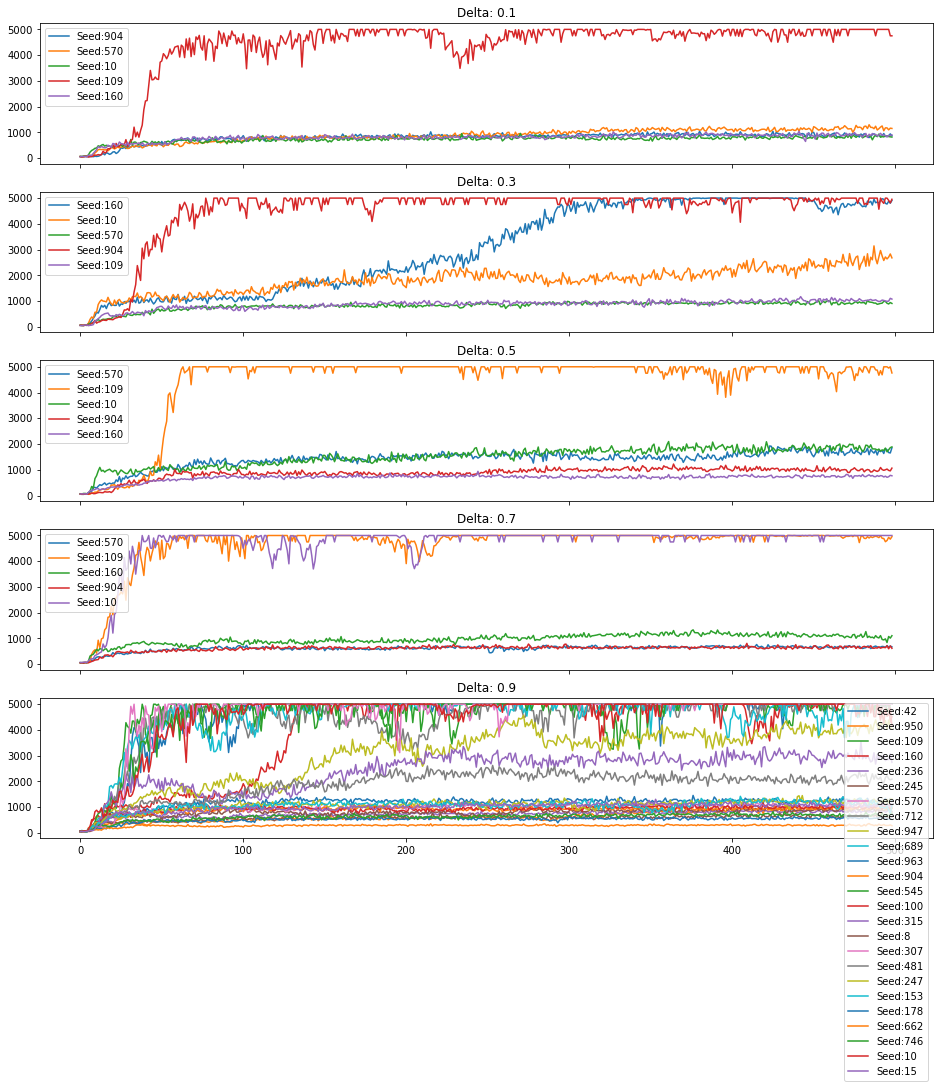

In [14]:
N = 5
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,N*3), sharex=True, sharey=True)
for i, (delta) in enumerate([0.1, 0.3, 0.5, 0.7, 0.9]):
    query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'is',
        'config.delta': delta,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 20,
        'config.capacity': 5,
        'config.warm_start': True,
        'config.njobs': 10,
        #'config.experiment_name': 'pomis2_cartpole_cap5_tuning'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Delta: " + str(delta))
plt.show();

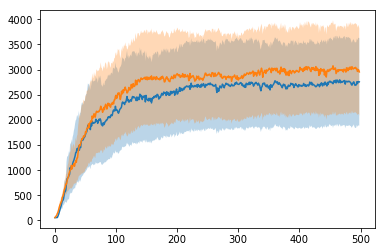

Seeds: 947, 545, 100, 950, 712, 178, 689, 963, 481, 307, 662, 15, 746, 247, 8, 42, 315, 245, 236, 153


In [20]:
query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'is',
        'config.delta': 0.4,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 20,
        'config.capacity': 5,
        'config.warm_start': True,
        'config.njobs': 10,
}
filtered_runs = filter_runs({**base_query, **query}, mis_runs_local)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
query_base = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'is',
        'config.delta': 0.4,
        'config.bound': 'max-d2',
        'config.num_episodes': 20,
        #'config.capacity': None,
        #'config.warm_start': None,
        #'config.njobs': 10,
}
filtered_runs_is = filter_runs({**base_query, **query_base}, total_runs)
plot_mean_ci(filtered_runs_is, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Inverted-pendulum

----------------------------------------
Delta: 0.3
Experiments: 5
Seeds: 570, 109, 10, 904, 160
----------------------------------------
Delta: 0.5
Experiments: 5
Seeds: 160, 904, 570, 10, 109
----------------------------------------
Delta: 0.7
Experiments: 88
Seeds: 160, 109, 689, 963, 8, 307, 545, 100, 545, 315, 481, 950, 712, 662, 963, 42, 307, 245, 8, 570, 153, 15, 178, 315, 100, 307, 950, 178, 153, 481, 689, 950, 963, 10, 481, 947, 689, 178, 15, 545, 689, 247, 15, 236, 8, 315, 236, 950, 662, 904, 947, 746, 662, 160, 42, 245, 236, 746, 746, 153, 247, 100, 545, 109, 307, 712, 15, 315, 712, 963, 42, 245, 247, 947, 904, 570, 236, 712, 178, 153, 100, 247, 947, 662, 42, 746, 8, 481
----------------------------------------
Delta: 0.9
Experiments: 5
Seeds: 160, 904, 570, 109, 10
----------------------------------------
Delta: 0.99
Experiments: 5
Seeds: 570, 904, 160, 109, 10


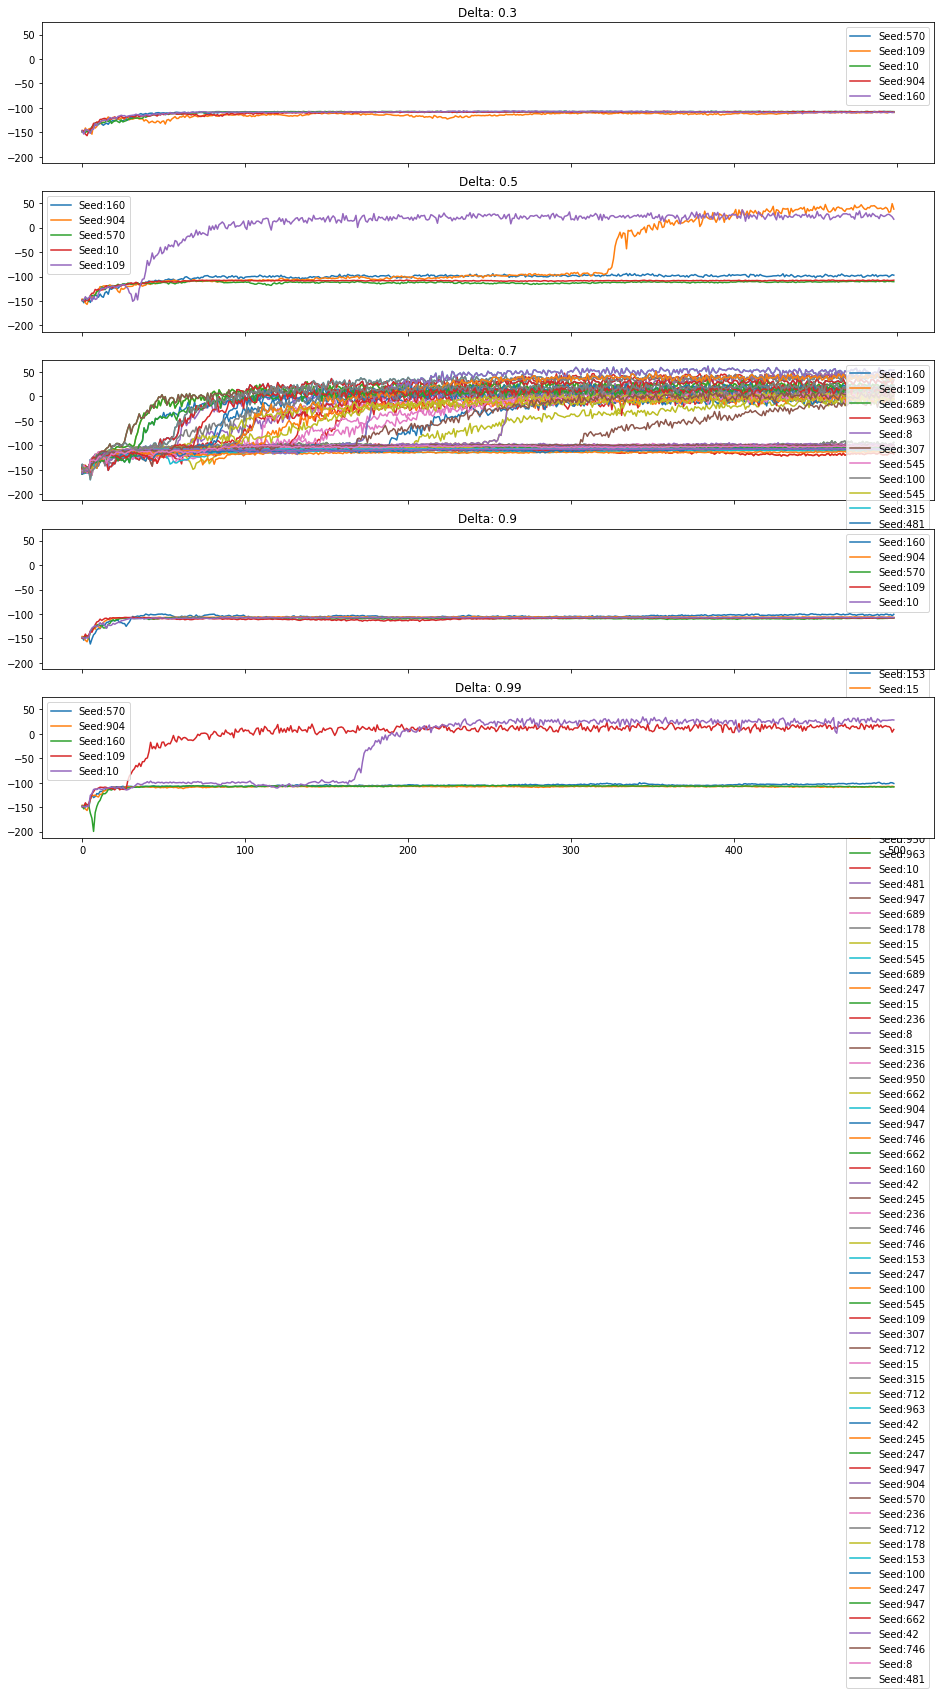

In [9]:
N = 5
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,N*3), sharex=True, sharey=True)
for i, (delta) in enumerate([0.3, 0.5, 0.7, 0.9, 0.99]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': 'is',
        'config.delta': delta,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
        'config.njobs': 10,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Delta: " + str(delta))
plt.show();

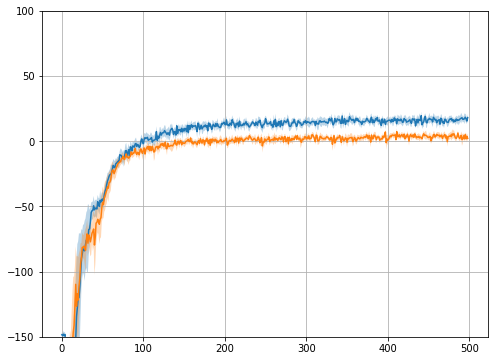

Seeds: 245, 160, 570, 10, 8, 10, 570, 481, 904, 160, 109, 15, 712, 109, 904


In [151]:
query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.7,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
        'config.njobs': 10,
        'config.policy_init': 'zeros',
        'config.entropy': 'none',
        'config.gamma': 0.99
}
filtered_runs = filter_runs({**base_query, **query}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)

query_base = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.9,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.capacity': None,
        'config.warm_start': None,
        'config.gamma': 0.99,
        'config.experiment_name': 'pois_ip_gamma99_cg'
}
'''
query_base = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.7,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
        'config.njobs': 10,
        'config.policy_init': 'zeros',
        'config.entropy': 'none'
}
'''
filtered_runs_is = filter_runs({**base_query, **query_base}, total_runs)
plot_mean_ci(filtered_runs_is, 'EpRewMean', axis)
plt.ylim(-150, 100)
plt.grid()
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs_is[key]['config']['seed'] for key in filtered_runs_is.keys()])))

### TRPO

[[  179   325   439 ... 50321 50421 50523]
 [  169   306   420 ... 50311 50412 50513]
 [  174   314   424 ... 50321 50421 50522]
 ...
 [  167   312   423 ... 50337 50437 50538]
 [  172   305   415 ... 50338 50438 50539]
 [  190   332   443 ... 50345 50446 50547]]


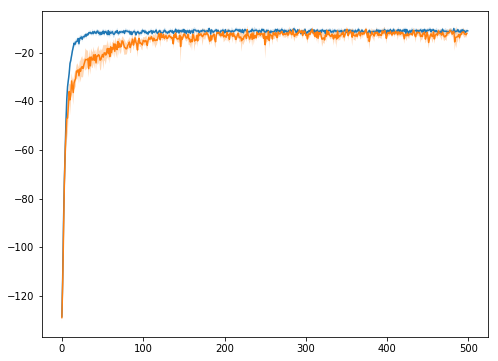

In [171]:
from collections import defaultdict
import scipy.stats as sts

log_names = glob.glob('../tmp_cout/trpo_ip_short_gamma1/*.txt')
def parse_log(log_path):
    results = defaultdict(list)
    lines = open(log_path, 'r').readlines()
    for i, l in enumerate(lines):
        if 'AverageReturn' in l:
            r = float(l.split()[1])
            eps = int(lines[i+2].split()[1])
            results['return'].append(r)
            results['episodes'].append(eps)
    return results
logs = {log_path: parse_log(log_path) for log_path in log_names}
# Create matrix of values
rets = np.array([l['return'] for _, l in logs.items()])
eps = np.array([l['episodes'] for _, l in logs.items()])
eps = np.cumsum(eps, axis=1)
print(eps)
# Plot
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
mean = np.mean(rets, axis=0)
std = np.std(rets, axis=0)
interval = sts.t.interval(0.95, rets.shape[0]-1, loc=mean, scale=std/np.sqrt(rets.shape[0]))
axis.plot(mean)
axis.fill_between(range(len(mean)),interval[0], interval[1], alpha=0.2, label='TRPO')

# Plot also POIS
query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.9,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.njobs': 10,
        'config.policy_init': 'zeros',
        'config.gamma': 0.99,
        'config.horizon': 100
}
filtered_runs = filter_runs({**base_query, **query}, total_runs)
plot_mean_ci(filtered_runs, 'EpRewMean', axis)

plt.show();

## Inverted Double Pendulum

----------------------------------------
Delta: 0.1
Experiments: 5
Seeds: 10, 904, 109, 160, 570
----------------------------------------
Delta: 0.3
Experiments: 5
Seeds: 904, 109, 160, 570, 10
----------------------------------------
Delta: 0.5
Experiments: 5
Seeds: 904, 160, 570, 10, 109
----------------------------------------
Delta: 0.7
Experiments: 5
Seeds: 904, 109, 570, 10, 160
----------------------------------------
Delta: 0.9
Experiments: 5
Seeds: 160, 904, 10, 570, 109
----------------------------------------
Delta: 0.99
Experiments: 5
Seeds: 160, 10, 570, 109, 904


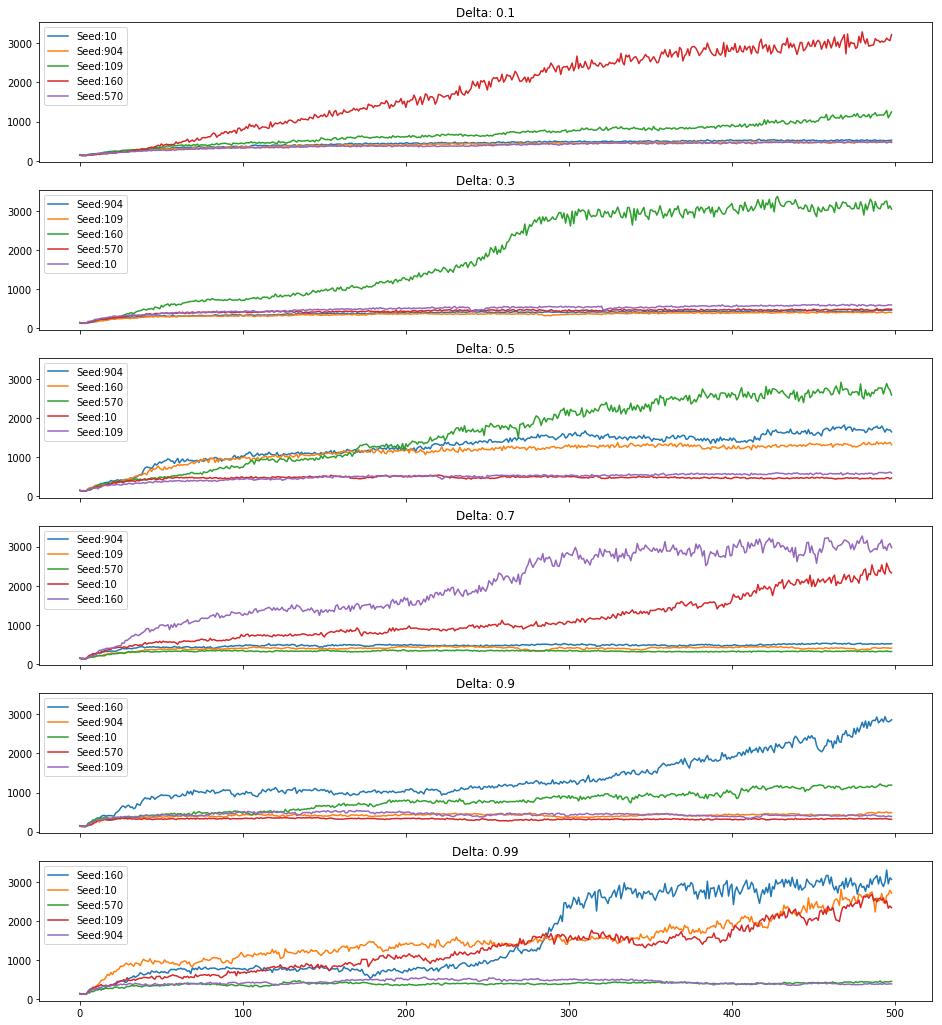

In [172]:
N = 6
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,N*3), sharex=True, sharey=True)
for i, (delta) in enumerate([0.1, 0.3, 0.5, 0.7, 0.9, 0.99]):
    query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'is',
        'config.delta': delta,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
        'config.njobs': 10,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Delta: " + str(delta))
plt.show();

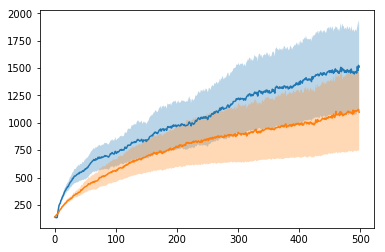

Seeds: 178, 42, 100, 963, 307, 947, 236, 315, 689, 153, 236, 662, 712, 8, 245, 160, 247, 746, 15, 178, 570, 545, 481, 315, 904, 109, 481, 153, 950, 10


In [181]:
query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.99,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
}
filtered_runs = filter_runs({**base_query, **query}, mis_runs_local)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
query_base = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.1,
        'config.bound': 'max-d2',
        'config.num_episodes': 100
}
filtered_runs_is = filter_runs({**base_query, **query_base}, total_runs)
plot_mean_ci(filtered_runs_is, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Acrobot

----------------------------------------
Delta: 0.1
Experiments: 5
Seeds: 160, 570, 10, 904, 109
----------------------------------------
Delta: 0.3
Experiments: 5
Seeds: 160, 10, 570, 904, 109
----------------------------------------
Delta: 0.5
Experiments: 5
Seeds: 160, 10, 904, 570, 109
----------------------------------------
Delta: 0.7
Experiments: 5
Seeds: 160, 10, 570, 904, 109
----------------------------------------
Delta: 0.9
Experiments: 5
Seeds: 904, 109, 570, 160, 10
----------------------------------------
Delta: 0.99
Experiments: 5
Seeds: 904, 160, 570, 10, 109
----------------------------------------
Delta: 0.9999
Experiments: 5
Seeds: 904, 570, 10, 160, 109


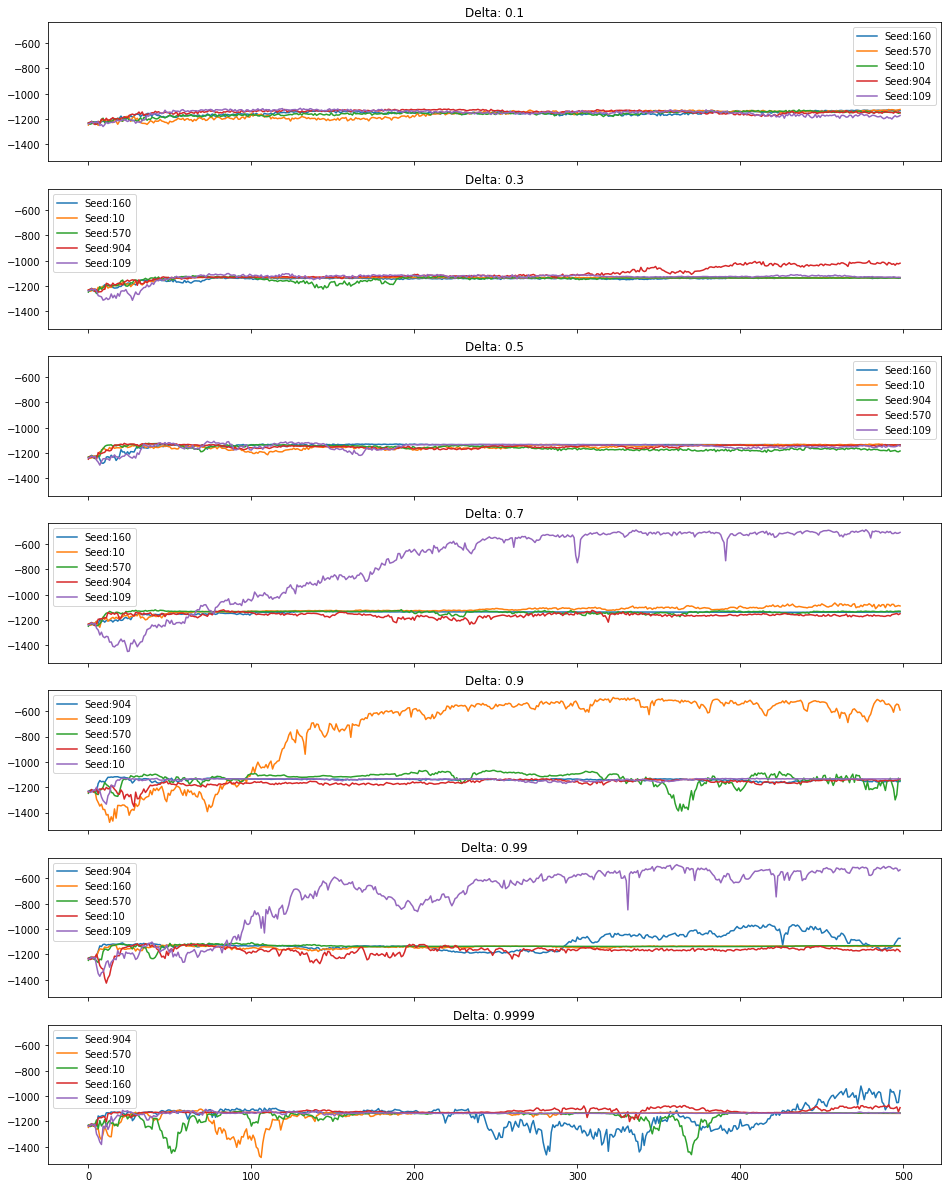

In [11]:
N = 7
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,N*3), sharex=True, sharey=True)
for i, (delta) in enumerate([0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 0.9999]):
    query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': 'is',
        'config.delta': delta,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
        'config.njobs': 10,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Delta: " + str(delta))
plt.show();

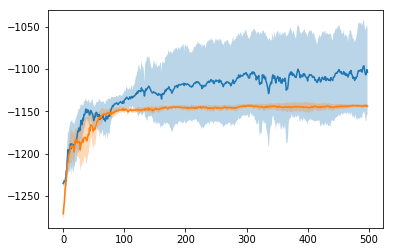

Seeds: 245, 236, 662, 950, 15, 247, 963, 42, 307, 746, 8, 481, 947, 689, 712, 545, 178, 315, 10, 109, 904, 570, 160, 153, 100


In [15]:
query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': 'is',
        'config.delta': 0.9,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
}
filtered_runs = filter_runs({**base_query, **query}, mis_runs_local)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
query_base = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': 'is',
        'config.delta': 0.7,
        'config.bound': 'max-d2',
        'config.num_episodes': 100
}
filtered_runs_is = filter_runs({**base_query, **query_base}, total_runs)
plot_mean_ci(filtered_runs_is, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Mountain car

----------------------------------------
Delta: 0.1
Experiments: 5
Seeds: 904, 10, 160, 109, 570
----------------------------------------
Delta: 0.3
Experiments: 5
Seeds: 10, 904, 109, 160, 570
----------------------------------------
Delta: 0.5
Experiments: 5
Seeds: 570, 10, 160, 904, 109
----------------------------------------
Delta: 0.7
Experiments: 5
Seeds: 160, 904, 570, 10, 109
----------------------------------------
Delta: 0.9
Experiments: 5
Seeds: 904, 160, 570, 109, 10


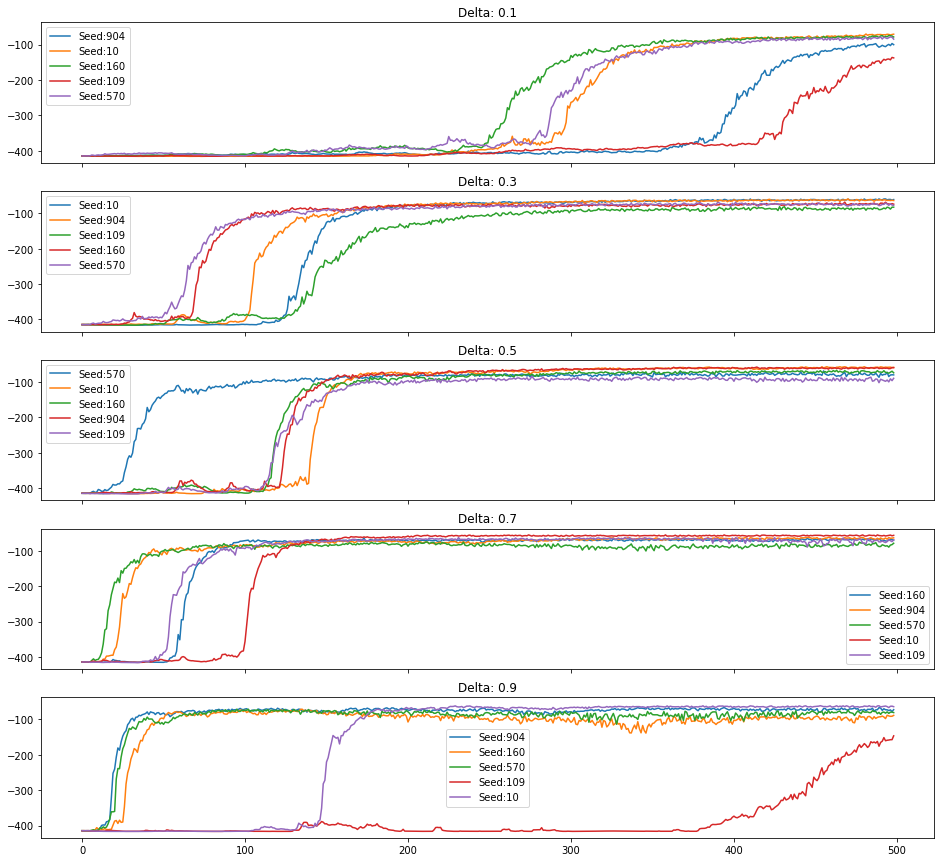

In [23]:
N = 5
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,N*3), sharex=True, sharey=True)
for i, (delta) in enumerate([0.1, 0.3, 0.5, 0.7, 0.9]):
    query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': 'is',
        'config.delta': delta,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
        'config.njobs': 10,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Delta: " + str(delta))
plt.show();

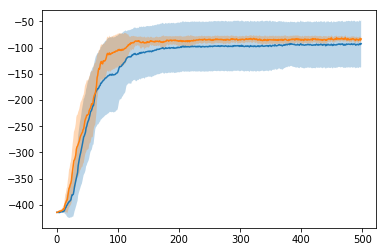

Seeds: 160, 904, 10, 109, 746, 963, 662, 689, 947, 247, 100, 236, 307, 153, 570


In [27]:
query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': 'is',
        'config.delta': 0.7,
        'config.bound': 'max-d2-harmonic',
        'config.num_episodes': 100,
        'config.capacity': 5,
        'config.warm_start': True,
}
filtered_runs = filter_runs({**base_query, **query}, mis_runs_local)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
query_base = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': 'is',
        'config.delta': 0.9,
        'config.bound': 'max-d2',
        'config.num_episodes': 100
}
filtered_runs_is = filter_runs({**base_query, **query_base}, total_runs)
plot_mean_ci(filtered_runs_is, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))